In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

# Incarcarea setului de date iris
# Task: Incarcarea datelor pentru analiza
try:
    iris_df = pd.read_csv('iris.csv')
except:
    # Daca nu gaseste fisierul csv, il incarcam direct din biblioteca seaborn
    iris_df = sns.load_dataset('iris')

# Curatare date: stergem coloana Unnamed daca exista
if 'Unnamed: 0' in iris_df.columns:
    iris_df = iris_df.drop('Unnamed: 0', axis=1)

print("Datele au fost incarcate cu succes!")

Datele au fost incarcate cu succes!


In [2]:
# 1. Analiza si vizualizarea datelor
# Task: Verificati setul de date (primele randuri si structura)
print("Primele 5 randuri:")
print(iris_df.head())

print("\nInformatii structura:")
iris_df.info()

# Task: Verificati distributia clusterelor (cate flori sunt din fiecare specie)
print("\nDistributia speciilor (Clustere reale):")
print(iris_df['species'].value_counts())

Primele 5 randuri:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Informatii structura:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Distributia speciilor (Clustere reale):
species
Iris-setosa        50
Iris-versicolor 

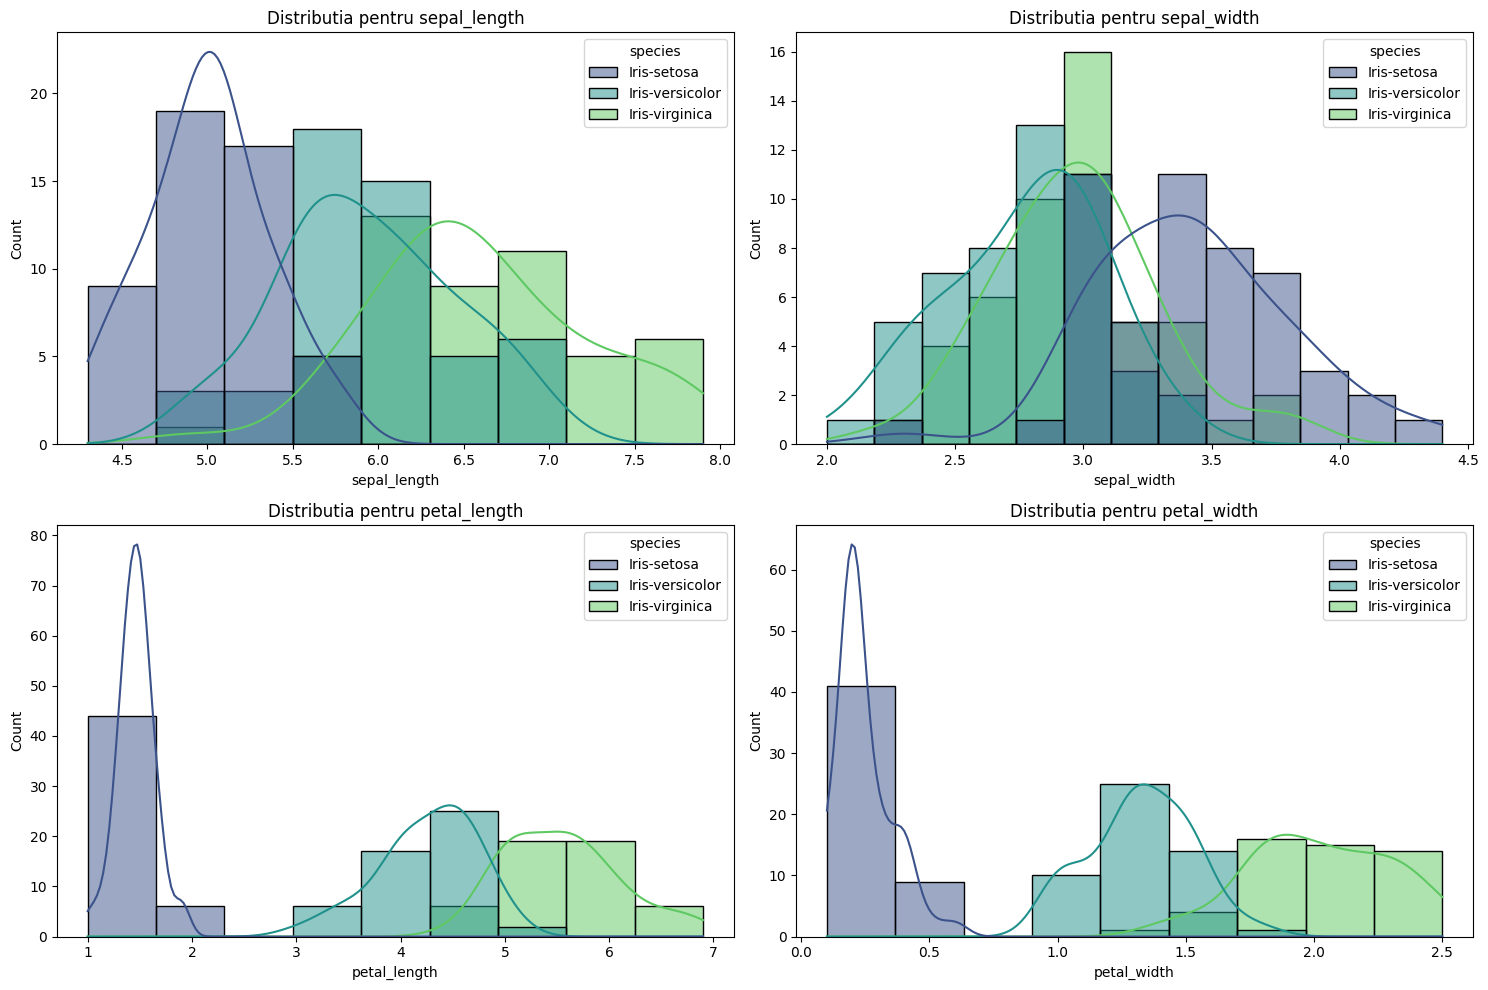

In [3]:
# Task: Verificati prin histograme diferentele dintre specii
# Alegem coloanele cu numere pentru grafice
coloane_numerice = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

plt.figure(figsize=(15, 10))
for i, col in enumerate(coloane_numerice):
    plt.subplot(2, 2, i+1)
    # Facem histograma colorata in functie de specie
    sns.histplot(data=iris_df, x=col, hue='species', kde=True, palette='viridis')
    plt.title(f'Distributia pentru {col}')

plt.tight_layout()
plt.show()

In [4]:
# Pregatire date pentru clustering
# Selectam doar coloanele numerice (fara numele speciei)
X = iris_df[coloane_numerice]

# Scalam datele (le aducem la aceeasi unitate de masura)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Datele au fost scalate si sunt gata de clustering.")

Datele au fost scalate si sunt gata de clustering.


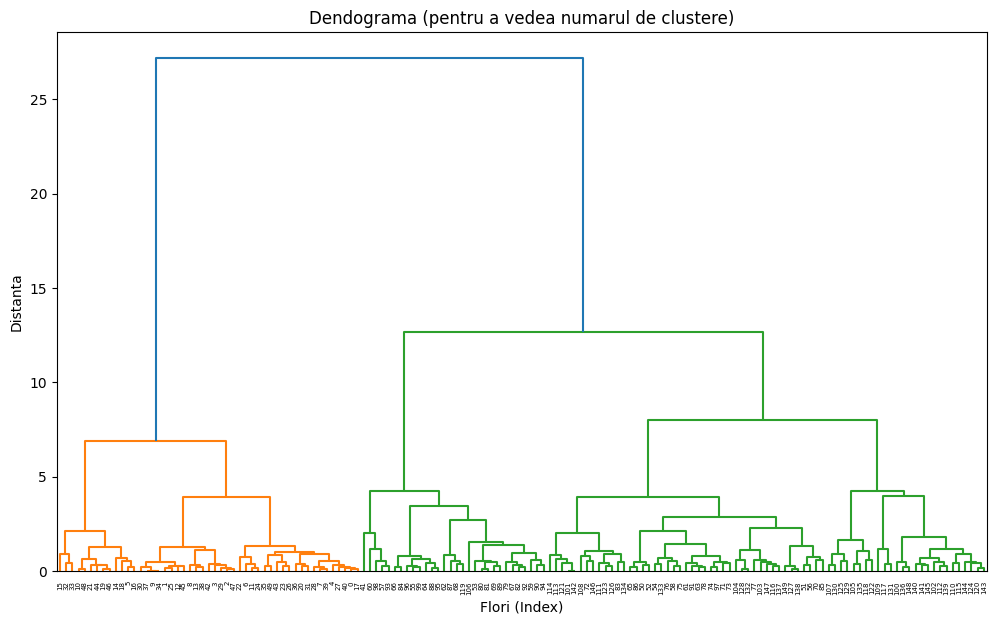

In [5]:
# 2. K-Means - Determinarea Numarului Optim de Clustere
# Task: Vizualizati clustering-ul ierarhic printr-o dendograma

plt.figure(figsize=(12, 7))
plt.title('Dendograma (pentru a vedea numarul de clustere)')
plt.xlabel('Flori (Index)')
plt.ylabel('Distanta')

# Generam dendograma folosind metoda ward
dendrograma = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.show()

In [6]:
# Task: Alegeti un numar optim de clustere k
# Din dendograma se vede ca 3 este un numar bun
k_optim = 3
print(f"Numarul optim de clustere ales este: {k_optim}")

# Task: Antrenati un model K-Means pentru k ales
kmeans = KMeans(n_clusters=k_optim, random_state=42, n_init=10)

# Prezicem clusterele pe datele scalate
clustere_prezise = kmeans.fit_predict(X_scaled)

# Adaugam rezultatul in tabelul nostru pentru a-l putea desena
iris_df['cluster_k_means'] = clustere_prezise

Numarul optim de clustere ales este: 3


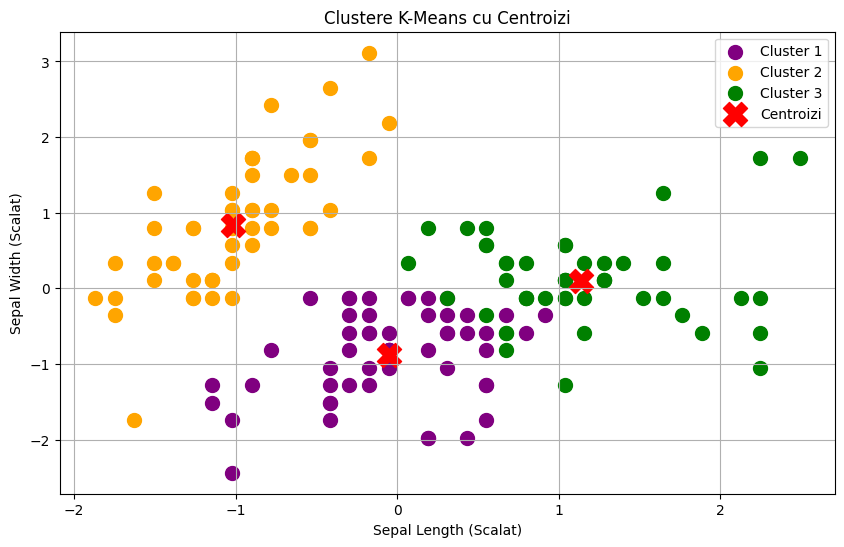

In [7]:
# Task: Vizualizati clusterele obtinute si afisati centroizii
plt.figure(figsize=(10, 6))

# Desenam punctele pentru fiecare cluster gasit de K-Means
# Folosim primele doua coloane scalate: Sepal Length vs Sepal Width
plt.scatter(X_scaled[clustere_prezise == 0, 0], X_scaled[clustere_prezise == 0, 1],
            s=100, c='purple', label='Cluster 1')
plt.scatter(X_scaled[clustere_prezise == 1, 0], X_scaled[clustere_prezise == 1, 1],
            s=100, c='orange', label='Cluster 2')
plt.scatter(X_scaled[clustere_prezise == 2, 0], X_scaled[clustere_prezise == 2, 1],
            s=100, c='green', label='Cluster 3')

# Desenam centroizii (punctele rosii din mijloc)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroizi')

plt.title('Clustere K-Means cu Centroizi')
plt.xlabel('Sepal Length (Scalat)')
plt.ylabel('Sepal Width (Scalat)')
plt.legend()
plt.grid(True)
plt.show()

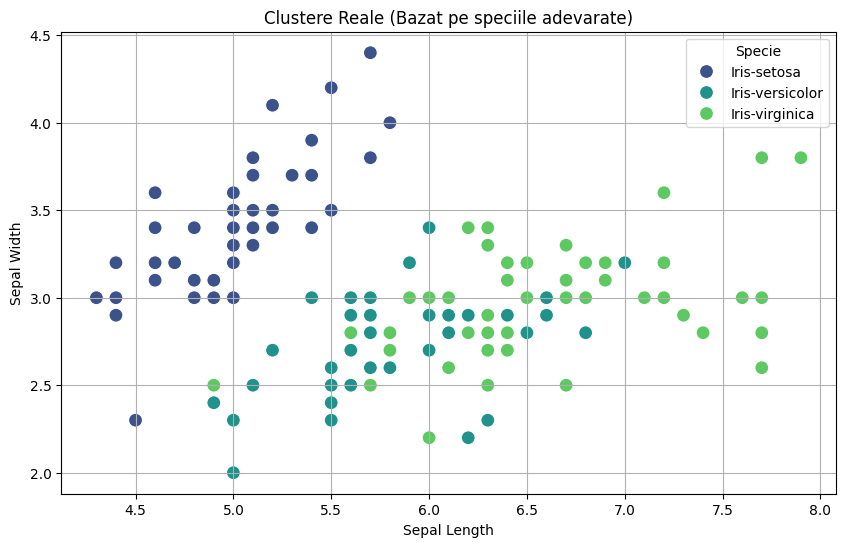

In [8]:
# Task: Creati un scatter plot cu adevaratele clustere (Species)
plt.figure(figsize=(10, 6))

# Folosim datele originale si coloram dupa coloana 'species'
sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width',
                hue='species', palette='viridis', s=100)

plt.title('Clustere Reale (Bazat pe speciile adevarate)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Specie')
plt.grid(True)
plt.show()